<a href="https://colab.research.google.com/github/reema9820/Prediction-using-Decision-Tree-Algorithm/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Sparks Foundation Task 6



Author: Reema Gupta

#Import the libraries

In [ ]:
#importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

#Loading The Dataset

In [ ]:
#reading the dataset 
df= pd.read_csv("/content/Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#Applying Data Cleaning Steps 

In [ ]:
#removing unneccessary columns
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
#formating or binarizing the target
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#creating a target column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Species)
df['target'] = label_encoder.transform(df.Species)

In [ ]:
#checking if traget column is succesfully created
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [ ]:
#checking if target column is successfully created
df.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
140,6.7,3.1,5.6,2.4,Iris-virginica,2
141,6.9,3.1,5.1,2.3,Iris-virginica,2
142,5.8,2.7,5.1,1.9,Iris-virginica,2
143,6.8,3.2,5.9,2.3,Iris-virginica,2
144,6.7,3.3,5.7,2.5,Iris-virginica,2
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [ ]:
#splitting into input and output
x = df.iloc[:, 0:4].values
y=df.target

#Train Test Split

In [ ]:
# Split data in Training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size  = 0.3, random_state =7)

In [ ]:
# Training using Decision Tree Classifier 
clf_dt = DecisionTreeClassifier()
#fitting the model in the decision tree classifier 
clf_dt.fit(X_train, Y_train) 
#predict
Y_pred_dt = clf_dt.predict(X_test)

In [21]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_pred_dt, Y_test)),
               columns =['Predicted', 'Actual'])
comparison[:10]

,Predicted,Actual
0,2,2
1,1,1
2,0,0
3,1,1
4,1,2
5,0,0
6,2,1
7,1,1
8,0,0
9,1,1


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_pred_dt,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      0.86      0.80        14
           2       0.88      0.79      0.83        19

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.87      0.87      0.87        45



Visualizing the decision tree

In [ ]:
import matplotlib.pyplot as plt

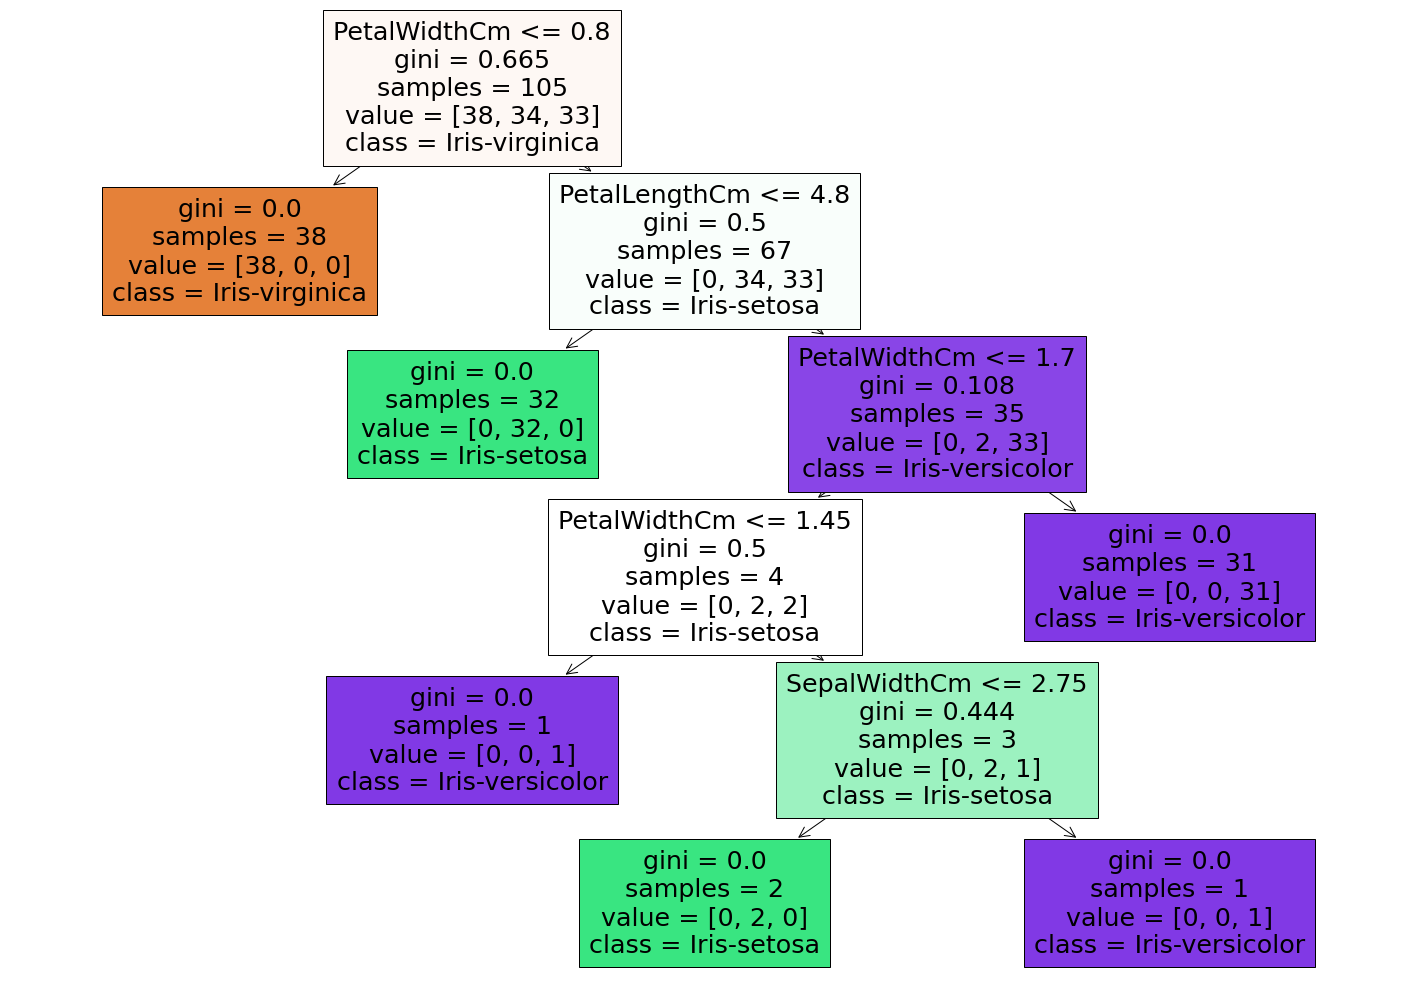

In [ ]:
from sklearn import tree
plt.figure(figsize=(25,18))
tree.plot_tree(clf_dt,
               feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
               class_names=["Iris-virginica","Iris-setosa","Iris-versicolor"], filled=True);